
# Milestone 3

## Lincoln Brown

## DSC540

## Professor Williams

In [1]:
# Import packages
from bs4 import BeautifulSoup as bs
from datetime import timedelta
from dateutil.parser import parse
import pandas as pd

pd.options.display.max_rows = 500
pd.options.display.max_seq_items = 500

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
<link data-savepage-href="https://moonblink.info/File/Graphics/ecsite/favicon.png" href="" rel="icon"/>
<title>Moon Data Table</title>
<link data-savepage-href="/File/Graphics/ecsite/favicon.png" href="" rel="icon" type="image/png"/>
<style data-savepage-href="/File/Styles/eclipse_site.css" type="text/css">
/*****************************************************************************
** Overall Site Style
*****************************************************************************/

/*
 * Overall page styles.
 */
body {
	max-width: 1200px;
	margin-left: auto;
	margin-right: auto;
	
	background-color:#eee;
	font-family: sans-serif;
	font-size: 95%;
}


/*****************************************************************************
** Common Page Structure
*****************************************************************************/

/*
 * The menu sidebar.  We make this fixed to the browser top so
 * it's alwa
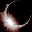
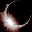
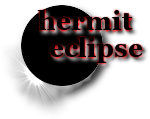
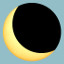
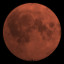
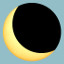
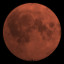

In [4]:
# Import the 2022 Moon Phase information
f1 = 'MoonDataTable_2022.html'


with open(f1, 'r') as file1:
    soup1 = bs(file1)
    
soup1

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
<link data-savepage-href="https://moonblink.info/File/Graphics/ecsite/favicon.png" href="" rel="icon"/>
<title>Moon Data Table</title>
<link data-savepage-href="/File/Graphics/ecsite/favicon.png" href="" rel="icon" type="image/png"/>
<style data-savepage-href="/File/Styles/eclipse_site.css" type="text/css">
/*****************************************************************************
** Overall Site Style
*****************************************************************************/

/*
 * Overall page styles.
 */
body {
	max-width: 1200px;
	margin-left: auto;
	margin-right: auto;
	
	background-color:#eee;
	font-family: sans-serif;
	font-size: 95%;
}


/*****************************************************************************
** Common Page Structure
*****************************************************************************/

/*
 * The menu sidebar.  We make this fixed to the browser top so
 * it's alwa
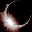
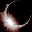
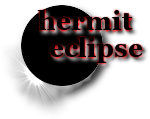
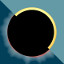
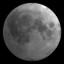
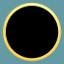
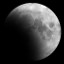

In [5]:
# Import the 2023 Moon Phase information
f2 = 'MoonDataTable_2023.html'
with open(f2, 'r') as file2:
    soup2 = bs(file2)

soup2

In [6]:
# Get the headers for the 2022 table
table_22 = soup1.tbody
headers_22_data = table_22.find_all('th')
headers_22 = []
for header in headers_22_data:
        headers_22.append(header.text)

headers_22.remove('Moon Size')
moon_size_22 = headers_22[-2:]
headers_22 = headers_22[:-2]
headers_22[-1:-1] = moon_size_22
headers_22.append('Eclipse Type')
print(headers_22)


['Event', 'Sun Distance', 'Sun Size', 'Moon Dist.', 'Geo', 'Zenith', 'Moon Mag', 'Eclipse Type']


## Step 1:
## Clean up the extra rows
Clean up the extra rows and put the second rows content in the appropriate column in the previous row

In [7]:
# The table is laid out a little weird. There are 2 columns of headers
# and two columns for every "row" of data
# Since the eclipse data is the only thing that populates the second row
# and there aren't very many of them, I will add them to a dict 
# and import the values into the df after I pass through initially to grab the data
# Get the rows
row_data = table_22.find_all('tr')
# Create an empty df to hold the data
moon_22_df = pd.DataFrame(columns=headers_22)
# Empty dict to hold the eclipse info and the index of where it belongs 
# On the main dataframe
eclipses = {}
# Need to use index to track which rows have data vs eclipse data
# Skip header rows
for index, tr in enumerate(row_data[2:]):
    # Empty list for df values
    values = []
    # Eclipse rows
    if(index % 2 != 0):
        for td in tr.find_all('td'):
            idx = len(moon_22_df)-1
            eclipse = td.get_text()
            if(eclipse.__contains__("Eclipse")):
                #print(f"Eclipse: {eclipse} {idx}")
                eclipses[idx] = eclipse
    # Rows that contain data
    elif(index %2 == 0):
        for td in tr.find_all('td'):
            value = td.get_text()
            #print(value)
            values.append(value)
    idx = len(moon_22_df)
    # Need to check for length of values because we need 8 columns total
    # The rows that aren't eclipse won't have a picture, so I need to add None
    if(len(values) == 7):
        values.append("None") #Place holder for eclipse
        moon_22_df.loc[len(moon_22_df)] = values
    # Rows that have eclipse data will contain a picture, so I don't need to add anything
    elif(len(values) == 8):
        moon_22_df.loc[len(moon_22_df)] = values

# Iterate through the eclipse data and add it to the dataframe
for key,value in eclipses.items():
    moon_22_df.loc[key,'Eclipse Type'] = eclipses[key]
        
moon_22_df

,Event,Sun Distance,Sun Size,Moon Dist.,Geo,Zenith,Moon Mag,Eclipse Type
0,"1 Jan, 202223:01:12 UT\nPerigee","147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%),None
1,"2 Jan, 202218:33:30 UT\nNew Moon","147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%),None
2,"14 Jan, 202209:28:37 UT\nApogee","147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),None
3,"17 Jan, 202223:48:35 UT\nFull Moon","147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%),None
4,"30 Jan, 202207:10:17 UT\nPerigee","147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%),None
5,"1 Feb, 202205:46:02 UT\nNew Moon","147,405,946 km(-1.5%)",0.541°(+1.5%),"365,182 km(-4.6%)",0.545°(+4.5%),0.555°(+4.6%),-13.09(+12.2%),None
6,"11 Feb, 202202:39:56 UT\nApogee","147,635,259 km(-1.3%)",0.540°(+1.3%),"404,898 km(+5.8%)",0.492°(-5.7%),0.499°(-5.8%),-12.87(-9.0%),None
7,"16 Feb, 202216:56:38 UT\nFull Moon","147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%),None
8,"26 Feb, 202222:19:18 UT\nPerigee","148,134,540 km(-1.0%)",0.538°(+1.0%),"367,792 km(-3.9%)",0.541°(+3.8%),0.551°(+3.8%),-13.07(+9.5%),None
9,"2 Mar, 202217:34:44 UT\nNew Moon","148,272,747 km(-0.9%)",0.538°(+0.9%),"375,029 km(-2.0%)",0.531°(+1.8%),0.540°(+1.8%),-13.02(+5.1%),None


In [8]:
# Rinse and repeat for 2023's data
# Get the headers for the 2023 table
table_23 = soup2.tbody
headers_23_data = table_23.find_all('th')
headers_23 = []
for header in headers_23_data:
        headers_23.append(header.text)

headers_23.remove('Moon Size')
moon_size_23 = headers_23[-2:]
headers_23 = headers_23[:-2]
headers_23[-1:-1] = moon_size_23
headers_23.append('Eclipse Type')
print(headers_23)


['Event', 'Sun Distance', 'Sun Size', 'Moon Dist.', 'Geo', 'Zenith', 'Moon Mag', 'Eclipse Type']


In [9]:
# The table is laid out a little weird. There are 2 columns of headers
# and two columns for every "row" of data
# Since the eclipse data is the only thing that populates the second row
# and there aren't very many of them, I will add them to a dict 
# and import the values into the df after I pass through initially to grab the data
# Get the rows
row_data_23 = table_23.find_all('tr')
# Create an empty df to hold the data
moon_23_df = pd.DataFrame(columns=headers_23)
# Empty dict to hold the eclipse info and the index of where it belongs 
# On the main dataframe
eclipses_23 = {}
# Need to use index to track which rows have data vs eclipse data
# Skip header rows
for index, tr in enumerate(row_data_23[2:]):
    # Empty list for df values
    values = []
    # Eclipse rows
    if(index % 2 != 0):
        for td in tr.find_all('td'):
            idx = len(moon_23_df)-1
            eclipse = td.get_text()
            if(eclipse.__contains__("Eclipse")):
                #print(f"Eclipse: {eclipse} {idx}")
                eclipses_23[idx] = eclipse
    # Rows that contain data
    elif(index %2 == 0):
        for td in tr.find_all('td'):
            value = td.get_text()
            #print(value)
            values.append(value)
    idx = len(moon_23_df)
    # Need to check for length of values because we need 8 columns total
    # The rows that aren't eclipse won't have a picture, so I need to add None
    if(len(values) == 7):
        values.append("None") #Place holder for eclipse
        moon_23_df.loc[len(moon_23_df)] = values
    # Rows that have eclipse data will contain a picture, so I don't need to add anything
    elif(len(values) == 8):
        moon_23_df.loc[len(moon_23_df)] = values

# Iterate through the eclipse data and add it to the dataframe
for key,value in eclipses_23.items():
    moon_23_df.loc[key,'Eclipse Type'] = eclipses_23[key]
    pass
    
print(eclipses_23)
moon_23_df

{15: 'Hybrid Solar Eclipse', 17: 'Penumbral Lunar Eclipse', 40: 'Annular Solar Eclipse', 42: 'Partial Lunar Eclipse'}


,Event,Sun Distance,Sun Size,Moon Dist.,Geo,Zenith,Moon Mag,Eclipse Type
0,"6 Jan, 202323:07:58 UT\nFull Moon","147,101,334 km(-1.7%)",0.542°(+1.7%),"405,789 km(+6.0%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),None
1,"8 Jan, 202309:20:25 UT\nApogee","147,105,366 km(-1.7%)",0.542°(+1.7%),"406,458 km(+6.2%)",0.490°(-6.1%),0.497°(-6.2%),-12.87(-9.1%),None
2,"21 Jan, 202320:53:09 UT\nNew Moon","147,226,497 km(-1.6%)",0.542°(+1.6%),"356,571 km(-6.8%)",0.558°(+7.0%),0.568°(+7.1%),-13.15(+17.9%),None
3,"21 Jan, 202320:58:40 UT\nPerigee","147,226,548 km(-1.6%)",0.542°(+1.6%),"356,571 km(-6.8%)",0.558°(+7.0%),0.568°(+7.1%),-13.15(+17.9%),None
4,"4 Feb, 202308:56:39 UT\nApogee","147,460,968 km(-1.4%)",0.541°(+1.5%),"406,477 km(+6.2%)",0.490°(-6.1%),0.497°(-6.2%),-12.86(-9.5%),None
5,"5 Feb, 202318:28:38 UT\nFull Moon","147,492,990 km(-1.4%)",0.541°(+1.4%),"405,830 km(+6.1%)",0.490°(-6.0%),0.498°(-6.1%),-12.86(-9.3%),None
6,"19 Feb, 202309:06:58 UT\nPerigee","147,877,201 km(-1.2%)",0.539°(+1.2%),"358,268 km(-6.4%)",0.556°(+6.5%),0.565°(+6.6%),-13.13(+15.8%),None
7,"20 Feb, 202307:05:43 UT\nNew Moon","147,906,246 km(-1.1%)",0.539°(+1.1%),"359,065 km(-6.2%)",0.554°(+6.3%),0.564°(+6.4%),-13.12(+15.2%),None
8,"3 Mar, 202318:02:04 UT\nApogee","148,293,498 km(-0.9%)",0.538°(+0.9%),"405,892 km(+6.1%)",0.490°(-6.0%),0.498°(-6.1%),-12.85(-10.3%),None
9,"7 Mar, 202312:40:23 UT\nFull Moon","148,434,426 km(-0.8%)",0.537°(+0.8%),"400,437 km(+4.6%)",0.497°(-4.7%),0.505°(-4.8%),-12.88(-8.0%),None


## Step 2:
## Concatenate the dataframes into one
Concatenate the 2 years of dataframes together

In [10]:
moon_df = pd.concat([moon_22_df, moon_23_df])
moon_df

,Event,Sun Distance,Sun Size,Moon Dist.,Geo,Zenith,Moon Mag,Eclipse Type
0,"1 Jan, 202223:01:12 UT\nPerigee","147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%),None
1,"2 Jan, 202218:33:30 UT\nNew Moon","147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%),None
2,"14 Jan, 202209:28:37 UT\nApogee","147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),None
3,"17 Jan, 202223:48:35 UT\nFull Moon","147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%),None
4,"30 Jan, 202207:10:17 UT\nPerigee","147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%),None
5,"1 Feb, 202205:46:02 UT\nNew Moon","147,405,946 km(-1.5%)",0.541°(+1.5%),"365,182 km(-4.6%)",0.545°(+4.5%),0.555°(+4.6%),-13.09(+12.2%),None
6,"11 Feb, 202202:39:56 UT\nApogee","147,635,259 km(-1.3%)",0.540°(+1.3%),"404,898 km(+5.8%)",0.492°(-5.7%),0.499°(-5.8%),-12.87(-9.0%),None
7,"16 Feb, 202216:56:38 UT\nFull Moon","147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%),None
8,"26 Feb, 202222:19:18 UT\nPerigee","148,134,540 km(-1.0%)",0.538°(+1.0%),"367,792 km(-3.9%)",0.541°(+3.8%),0.551°(+3.8%),-13.07(+9.5%),None
9,"2 Mar, 202217:34:44 UT\nNew Moon","148,272,747 km(-0.9%)",0.538°(+0.9%),"375,029 km(-2.0%)",0.531°(+1.8%),0.540°(+1.8%),-13.02(+5.1%),None


## Step 3:
## Split the Event column
The Event column contains a date, time, and event. I need to clean this column up and split it into a Timestamp and Event Column

In [11]:
moon_df_clean = moon_df.copy()
moon_df_clean[['Timestamp', 'Moon_Type']] = moon_df_clean['Event'].str.split("UT\n", expand=True)

del moon_df_clean['Event']

columns = ['Sun_Dist', 'Sun_Size', 'Moon_Dist', 'Geo', 'Zenith', 'Moon_Mag', 'Eclipse_Type', 'Timestamp', 'Moon_Type'] 

# Rename the columns to remove spaces
moon_df_clean.columns = columns

moon_df_clean


,Sun_Dist,Sun_Size,Moon_Dist,Geo,Zenith,Moon_Mag,Eclipse_Type,Timestamp,Moon_Type
0,"147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%),None,"1 Jan, 202223:01:12",Perigee
1,"147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%),None,"2 Jan, 202218:33:30",New Moon
2,"147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),None,"14 Jan, 202209:28:37",Apogee
3,"147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%),None,"17 Jan, 202223:48:35",Full Moon
4,"147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%),None,"30 Jan, 202207:10:17",Perigee
5,"147,405,946 km(-1.5%)",0.541°(+1.5%),"365,182 km(-4.6%)",0.545°(+4.5%),0.555°(+4.6%),-13.09(+12.2%),None,"1 Feb, 202205:46:02",New Moon
6,"147,635,259 km(-1.3%)",0.540°(+1.3%),"404,898 km(+5.8%)",0.492°(-5.7%),0.499°(-5.8%),-12.87(-9.0%),None,"11 Feb, 202202:39:56",Apogee
7,"147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%),None,"16 Feb, 202216:56:38",Full Moon
8,"148,134,540 km(-1.0%)",0.538°(+1.0%),"367,792 km(-3.9%)",0.541°(+3.8%),0.551°(+3.8%),-13.07(+9.5%),None,"26 Feb, 202222:19:18",Perigee
9,"148,272,747 km(-0.9%)",0.538°(+0.9%),"375,029 km(-2.0%)",0.531°(+1.8%),0.540°(+1.8%),-13.02(+5.1%),None,"2 Mar, 202217:34:44",New Moon


## Step 4:
## Clean Timestamp column and convert to datetime
Currently, our Timestamp column is a string that can't be parsed by the to_datetime function. This is because it does not contain a space after the year. We need to remedy this by running a quick regex expression and then converting the column

In [14]:
# We will start with copying the dataframe
moon_date = moon_df_clean.copy()

# Need to clean the Timestamp column before we can convert it
moon_date['Timestamp'] = moon_date['Timestamp'].str.replace(r"(\d{4})", lambda x: f"{x.group(0)} ", regex=True)

# Convert the cleaned column to a datetime
moon_date['Timestamp'] = pd.to_datetime(moon_date['Timestamp'])

# Time is already in UTC, but we will localize to make it explicit
moon_date['Timestamp'] = moon_date['Timestamp'].dt.tz_localize('UTC')
print(moon_date['Timestamp'].dtype)
moon_date

datetime64[ns, UTC]


,Sun_Dist,Sun_Size,Moon_Dist,Geo,Zenith,Moon_Mag,Eclipse_Type,Timestamp,Moon_Type
0,"147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%),None,2022-01-01 23:01:12+00:00,Perigee
1,"147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%),None,2022-01-02 18:33:30+00:00,New Moon
2,"147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),None,2022-01-14 09:28:37+00:00,Apogee
3,"147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%),None,2022-01-17 23:48:35+00:00,Full Moon
4,"147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%),None,2022-01-30 07:10:17+00:00,Perigee
5,"147,405,946 km(-1.5%)",0.541°(+1.5%),"365,182 km(-4.6%)",0.545°(+4.5%),0.555°(+4.6%),-13.09(+12.2%),None,2022-02-01 05:46:02+00:00,New Moon
6,"147,635,259 km(-1.3%)",0.540°(+1.3%),"404,898 km(+5.8%)",0.492°(-5.7%),0.499°(-5.8%),-12.87(-9.0%),None,2022-02-11 02:39:56+00:00,Apogee
7,"147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%),None,2022-02-16 16:56:38+00:00,Full Moon
8,"148,134,540 km(-1.0%)",0.538°(+1.0%),"367,792 km(-3.9%)",0.541°(+3.8%),0.551°(+3.8%),-13.07(+9.5%),None,2022-02-26 22:19:18+00:00,Perigee
9,"148,272,747 km(-0.9%)",0.538°(+0.9%),"375,029 km(-2.0%)",0.531°(+1.8%),0.540°(+1.8%),-13.02(+5.1%),None,2022-03-02 17:34:44+00:00,New Moon


In [15]:
# Set the index
moon_date.set_index('Timestamp', inplace=True, drop=False)
# Display results
moon_date.index.dtype

datetime64[ns, UTC]

## Step 5:
## Reorganize the columns
Let's reorganize the columns and also use the index as a timestamp so we can generate a date range

In [16]:
# Now we can move the Moon_Type and Eclipse Type columms
cols = list(moon_date.columns)

idx = cols.index('Eclipse_Type')
cols = cols[idx:] + cols[:idx]
print(cols)
moon_date = moon_date.reindex(columns=cols)
moon_date

['Eclipse_Type', 'Timestamp', 'Moon_Type', 'Sun_Dist', 'Sun_Size', 'Moon_Dist', 'Geo', 'Zenith', 'Moon_Mag']


,Eclipse_Type,Timestamp,Moon_Type,Sun_Dist,Sun_Size,Moon_Dist,Geo,Zenith,Moon_Mag
Timestamp,,,,,,,,,
2022-01-01 23:01:12+00:00,None,2022-01-01 23:01:12+00:00,Perigee,"147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%)
2022-01-02 18:33:30+00:00,None,2022-01-02 18:33:30+00:00,New Moon,"147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%)
2022-01-14 09:28:37+00:00,None,2022-01-14 09:28:37+00:00,Apogee,"147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%)
2022-01-17 23:48:35+00:00,None,2022-01-17 23:48:35+00:00,Full Moon,"147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%)
2022-01-30 07:10:17+00:00,None,2022-01-30 07:10:17+00:00,Perigee,"147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%)
2022-02-01 05:46:02+00:00,None,2022-02-01 05:46:02+00:00,New Moon,"147,405,946 km(-1.5%)",0.541°(+1.5%),"365,182 km(-4.6%)",0.545°(+4.5%),0.555°(+4.6%),-13.09(+12.2%)
2022-02-11 02:39:56+00:00,None,2022-02-11 02:39:56+00:00,Apogee,"147,635,259 km(-1.3%)",0.540°(+1.3%),"404,898 km(+5.8%)",0.492°(-5.7%),0.499°(-5.8%),-12.87(-9.0%)
2022-02-16 16:56:38+00:00,None,2022-02-16 16:56:38+00:00,Full Moon,"147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%)
2022-02-26 22:19:18+00:00,None,2022-02-26 22:19:18+00:00,Perigee,"148,134,540 km(-1.0%)",0.538°(+1.0%),"367,792 km(-3.9%)",0.541°(+3.8%),0.551°(+3.8%),-13.07(+9.5%)


## Step 6: 
## Generate a custom interval range for full moons
We need to create a custom interval for the full moon's in 2022 and 2023, so that we can look for spikes in crime during these periods. 

In [17]:
# First, we will isolate the rows pertaining to a full moon
full_moons = moon_date.loc[moon_date['Moon_Type'] == 'Full Moon']
# We need an empty to list to store the date ranges
# We will use a 3 day range since the Full Moon can appear full for up to three days
full_moon_dates = []

# We need to create a range of one day before and one day after the full moon
# then add it to the full_moon_dates list
for date in full_moons['Timestamp']:
    day = timedelta(days=1)
    start = date - day
    end = date + day
    interval = (start, end)
    full_moon_dates.append(interval)

# Now we will use the list of tuples to create an Inteval Index
full_moon_intervals = pd.IntervalIndex.from_tuples(full_moon_dates)
full_moon_intervals

IntervalIndex([(2022-01-16 23:48:35+00:00, 2022-01-18 23:48:35+00:00],
               (2022-02-15 16:56:38+00:00, 2022-02-17 16:56:38+00:00],
               (2022-03-17 07:17:30+00:00, 2022-03-19 07:17:30+00:00],
               (2022-04-15 18:54:55+00:00, 2022-04-17 18:54:55+00:00],
               (2022-05-15 04:14:01+00:00, 2022-05-17 04:14:01+00:00],
               (2022-06-13 11:51:37+00:00, 2022-06-15 11:51:37+00:00],
               (2022-07-12 18:37:29+00:00, 2022-07-14 18:37:29+00:00],
               (2022-08-11 01:35:35+00:00, 2022-08-13 01:35:35+00:00],
               (2022-09-09 09:58:53+00:00, 2022-09-11 09:58:53+00:00],
               (2022-10-08 20:54:49+00:00, 2022-10-10 20:54:49+00:00],
               (2022-11-07 11:02:04+00:00, 2022-11-09 11:02:04+00:00],
               (2022-12-07 04:08:11+00:00, 2022-12-09 04:08:11+00:00],
               (2023-01-05 23:07:58+00:00, 2023-01-07 23:07:58+00:00],
               (2023-02-04 18:28:38+00:00, 2023-02-06 18:28:38+00:00],
      

In [18]:
# Full Moon Dataframe that is indexed on the Full Moon Intervals
full_moons.index = full_moon_intervals
full_moons

,Eclipse_Type,Timestamp,Moon_Type,Sun_Dist,Sun_Size,Moon_Dist,Geo,Zenith,Moon_Mag
"(2022-01-16 23:48:35+00:00, 2022-01-18 23:48:35+00:00]",None,2022-01-17 23:48:35+00:00,Full Moon,"147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%)
"(2022-02-15 16:56:38+00:00, 2022-02-17 16:56:38+00:00]",None,2022-02-16 16:56:38+00:00,Full Moon,"147,792,518 km(-1.2%)",0.540°(+1.2%),"391,885 km(+2.4%)",0.508°(-2.6%),0.516°(-2.7%),-12.94(-3.1%)
"(2022-03-17 07:17:30+00:00, 2022-03-19 07:17:30+00:00]",None,2022-03-18 07:17:30+00:00,Full Moon,"148,874,950 km(-0.5%)",0.536°(+0.5%),"380,826 km(-0.5%)",0.523°(+0.2%),0.531°(+0.2%),-12.98(+1.1%)
"(2022-04-15 18:54:55+00:00, 2022-04-17 18:54:55+00:00]",None,2022-04-16 18:54:55+00:00,Full Moon,"150,128,651 km(+0.3%)",0.531°(-0.4%),"370,261 km(-3.2%)",0.538°(+3.1%),0.547°(+3.1%),-13.02(+5.2%)
"(2022-05-15 04:14:01+00:00, 2022-05-17 04:14:01+00:00]",Total Lunar Eclipse,2022-05-16 04:14:01+00:00,Full Moon,"151,237,123 km(+1.1%)",0.527°(-1.1%),"362,127 km(-5.4%)",0.550°(+5.4%),0.559°(+5.5%),-13.06(+8.4%)
"(2022-06-13 11:51:37+00:00, 2022-06-15 11:51:37+00:00]",None,2022-06-14 11:51:37+00:00,Full Moon,"151,936,323 km(+1.5%)",0.525°(-1.5%),"357,658 km(-6.5%)",0.557°(+6.7%),0.566°(+6.8%),-13.07(+10.1%)
"(2022-07-12 18:37:29+00:00, 2022-07-14 18:37:29+00:00]",None,2022-07-13 18:37:29+00:00,Full Moon,"152,067,300 km(+1.6%)",0.524°(-1.6%),"357,418 km(-6.6%)",0.557°(+6.8%),0.567°(+6.9%),-13.07(+10.0%)
"(2022-08-11 01:35:35+00:00, 2022-08-13 01:35:35+00:00]",None,2022-08-12 01:35:35+00:00,Full Moon,"151,601,449 km(+1.3%)",0.526°(-1.3%),"361,409 km(-5.6%)",0.551°(+5.6%),0.560°(+5.7%),-13.06(+8.3%)
"(2022-09-09 09:58:53+00:00, 2022-09-11 09:58:53+00:00]",None,2022-09-10 09:58:53+00:00,Full Moon,"150,643,639 km(+0.7%)",0.529°(-0.7%),"369,128 km(-3.5%)",0.539°(+3.4%),0.549°(+3.4%),-13.02(+5.1%)
"(2022-10-08 20:54:49+00:00, 2022-10-10 20:54:49+00:00]",None,2022-10-09 20:54:49+00:00,Full Moon,"149,416,175 km(-0.1%)",0.534°(+0.1%),"379,480 km(-0.8%)",0.525°(+0.6%),0.533°(+0.6%),-12.98(+1.1%)


## Ethical Considerations
This dataset involves lunar data, and I have cleaned it to include only the Full Moon information. I end up finding another data source to get the other phases of the moon imported as well. Until then, my biggest ethical consideration is to avoid drawing any causation from potential correlation between the crime reported and the moon phase it was reported in. It is important that I am checking my data for completeness and accuracy. When joining the data for 2022 and 2023, I reused my code. I had gone through originally and made changes to reflect the 2023 data, but I had missed on particular import and it was affecting my output. If I had not checked my data, I could have been working with inaccurate data, which is both harmful to the analysis and unethical because it can cause undue perceptual distortion for the final audience. 